In [1]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pygraphviz as viz
import networkx as nx
import pandas as pd
import random
import numpy as np
from utils.draw import draw_graph, draw_partition, draw_partition2, draw_partition3

In [45]:
df = pd.read_csv('vk_links.csv')
df

,out_f,in_f
0,alisaborkova,anonskinonoch
1,tereshina,anonskinonoch
2,sinart,anonskinonoch
3,julietta.leks,anonskinonoch
4,irinalerman,anonskinonoch
5,id73902851,anonskinonoch
6,cherenkovaveronika,anonskinonoch
7,cocktailproject,anonskinonoch
8,dimatim,anonskinonoch
9,id84324595,anonskinonoch


In [47]:
users = set(df['out_f']).union(set(df['in_f']))

In [49]:
len(users)

491

In [4]:
G = nx.Graph()
for idx, row in df.iterrows():
    G.add_edge(row['out_f'], row['in_f'])

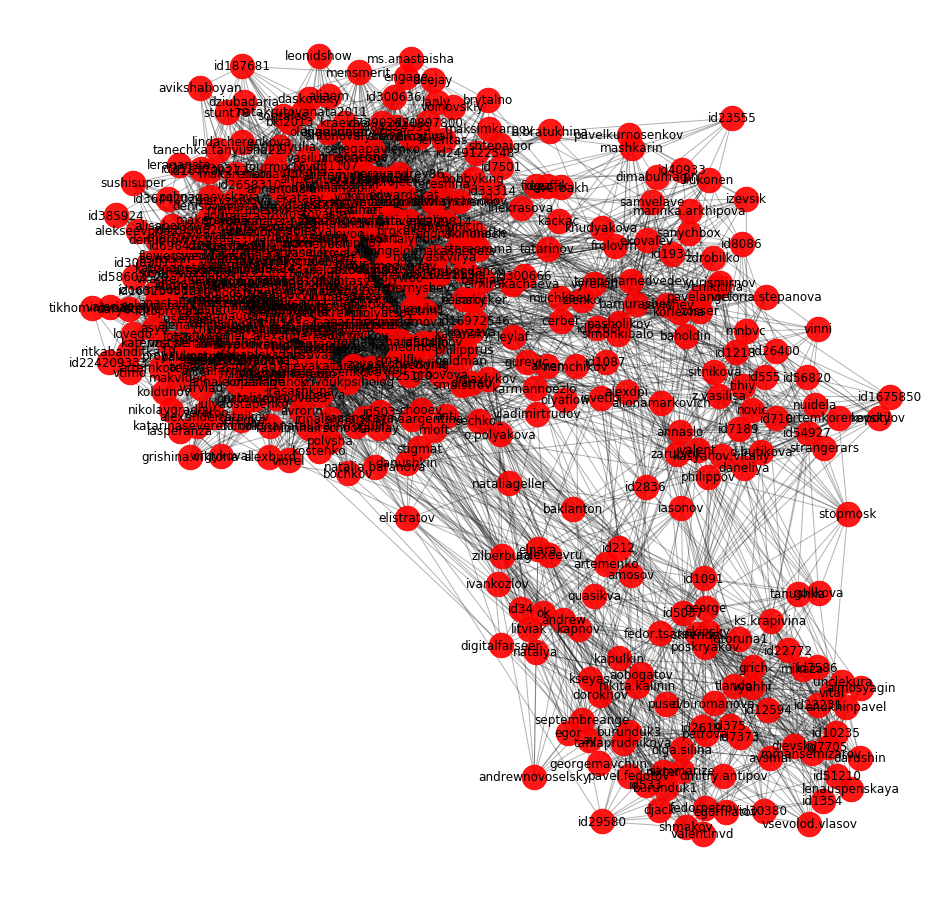

In [5]:
draw_graph(G)

## Best community partition

In [6]:
from community import community_louvain

In [7]:
partition = community_louvain.best_partition(G)

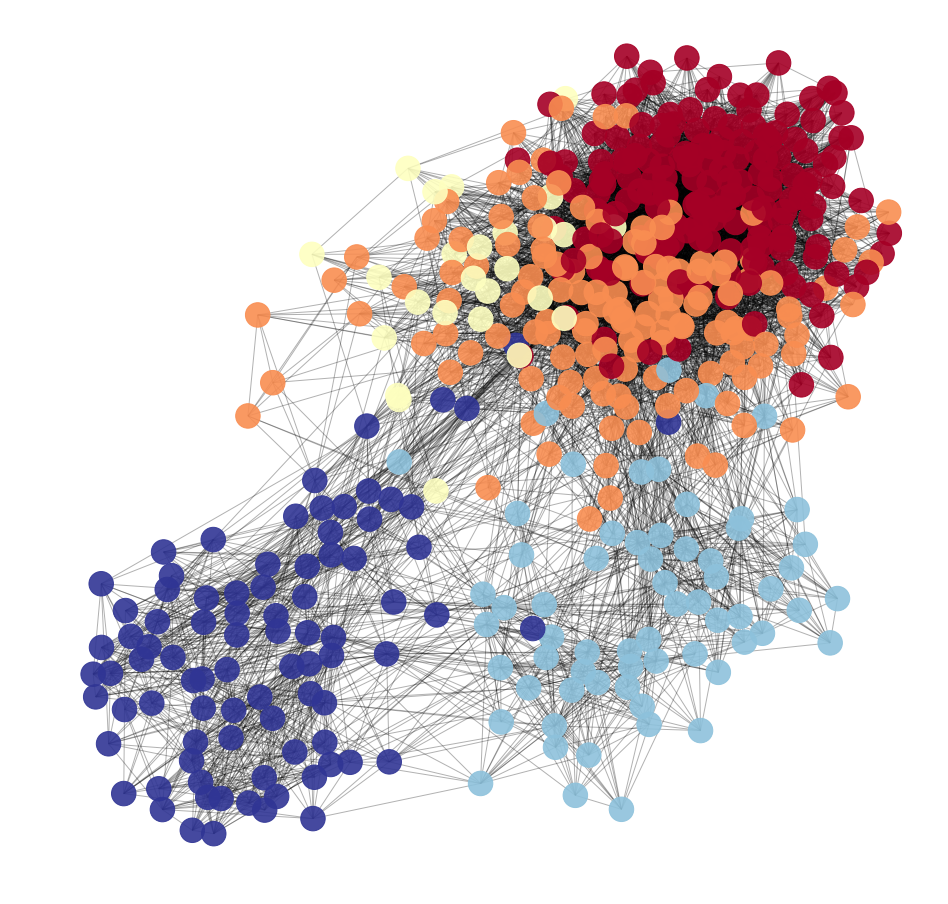

In [8]:
draw_partition2(G, partition)

## k-clique

In [9]:
from networkx.algorithms.community import k_clique_communities

In [10]:
def in_which(node, list_of_sets):
    idx = 0
    for s in list_of_sets:
        if node in s:
            return idx
        idx += 1

### k = 6

In [11]:
c = list(k_clique_communities(G, 5))
partition = [in_which(x, c) for x in list(G.nodes)]

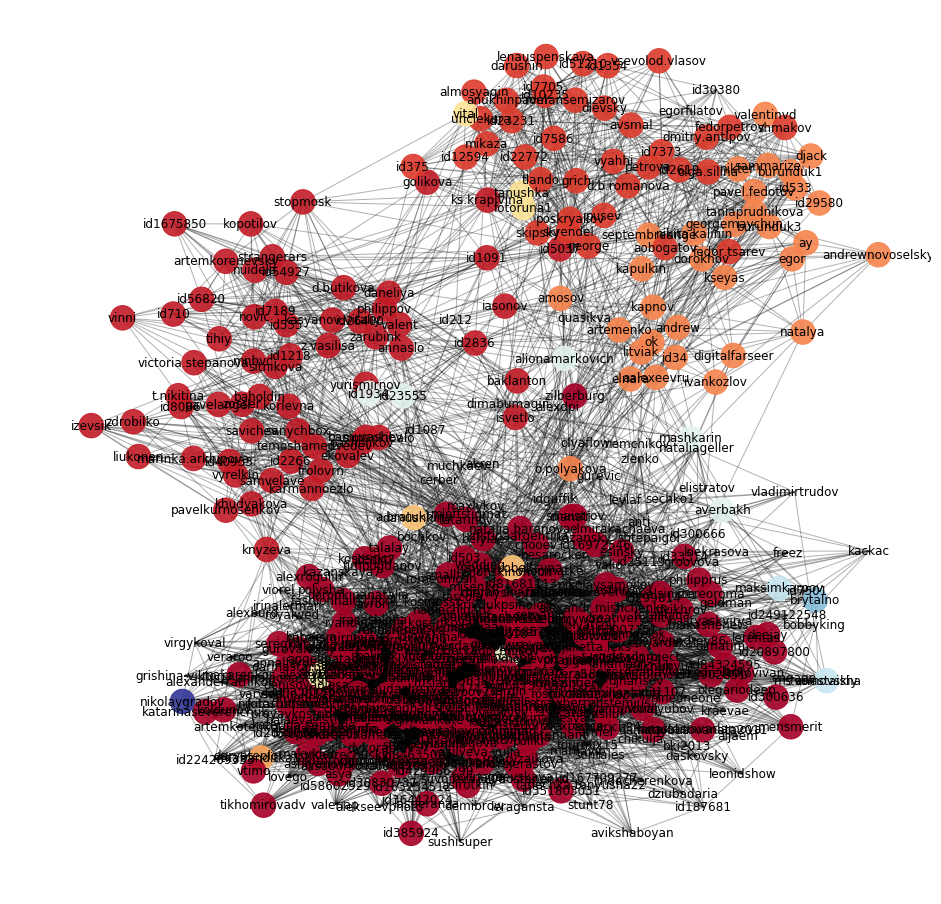

In [12]:
draw_partition3(G, partition)

## Finding leaders, agents and followers

### Методом обхода в ширину

Найдем роли пользователей в сообществе на примере одного из найденных сообществ

In [13]:
from collections import defaultdict, OrderedDict

In [22]:
partition = community_louvain.best_partition(G)
d = defaultdict(list)
for key, value in partition.items():
    d[value].append(key)

In [24]:
d

defaultdict(list,
            {0: ['alisaborkova',
              'irinalerman',
              'fotokubstudio',
              'virgykoval',
              'denisovaolesa',
              'kovalevea',
              'liubaeva',
              'misenko',
              'polysha',
              'igormalakhov',
              'e.islamov',
              'valeria.kosenkova',
              'asya',
              'avrorin',
              'belinskiyphoto',
              'alexanderkadochnikov',
              'helendomatskikh',
              'id503',
              'mariaokuneva',
              'id406',
              'tverdaya',
              'varvlad',
              'vital40in',
              'rinashmeleva',
              'cherrydarya',
              'kopalkin',
              'alexeytkachenko',
              'stylistanna',
              'annaivanovaphotographer',
              'alexanderratnikov',
              'anyagerasimova07',
              'romeomosh',
              'alenanikulina',
              'a

Возьмем первое найденное сообщество

In [15]:
first = G.subgraph(d[0]).copy()

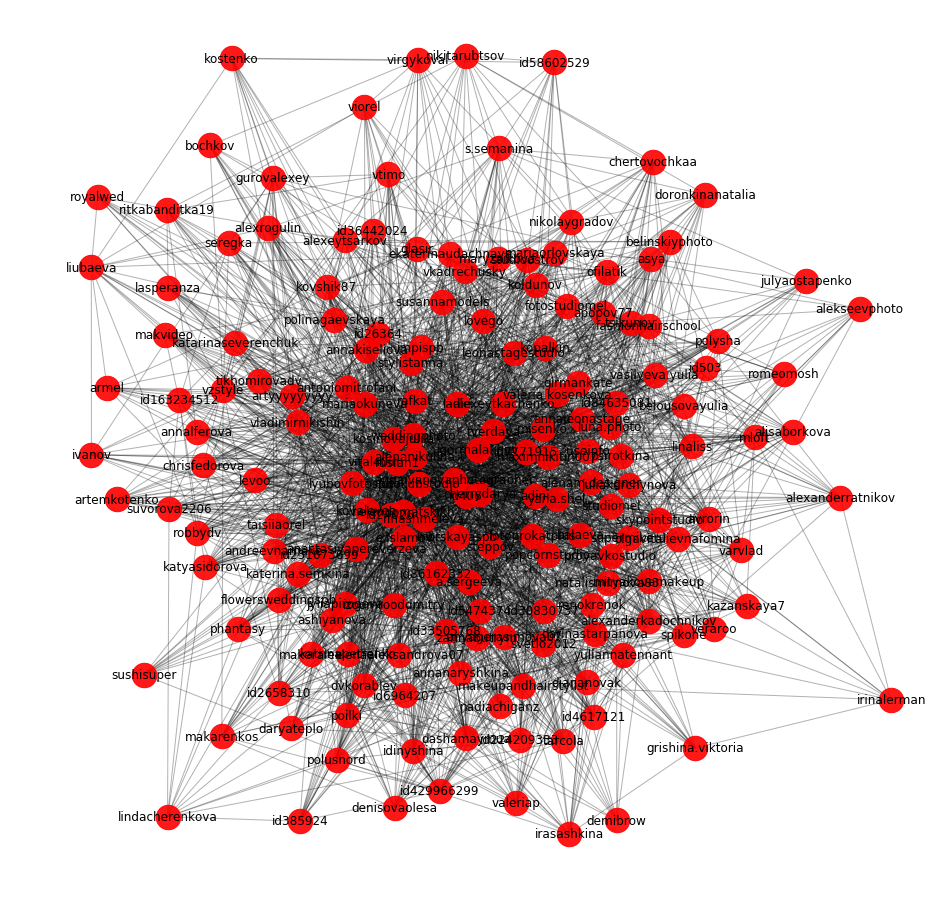

In [16]:
draw_graph(first)

#### Ранжировка пользователей

 1. Отсортируем пользователей по числу связей
 2. Возьмем 10% с наибольшим числом связей (N)
 3. Возьмем 10% с наименьшим числом связей (M)

Будем считать, что у лидера минимум связей, но при этом максимальный охват.
Выберем из N пользователей того, у кого больше всего связей с M пользователями - будем считать его лидером.

In [17]:
deg = list(first.degree)
deg.sort(key=lambda tup: tup[1])
top = deg[:int(len(deg)*0.1)]
bot = deg[-int(len(deg)*0.1):]

In [18]:
leaders = defaultdict(int)
for t in top:
    for n in bot:
        if n[0] in list(first.adj[t[0]]):
            leaders[t[0]] += 1

In [19]:
import operator
leader = max(leaders.items(), key=operator.itemgetter(1))[0]
leader

'lasperanza'

In [20]:
followers = set(first.adj[leader])
followers

{'annaivanovaphotographer',
 'cherrydarya',
 'id406',
 'id86162332',
 'kopalkin',
 'mariaokuneva',
 'rinashmeleva',
 'ritkabanditka19',
 'ruslan1',
 'tverdaya',
 'vital40in',
 'vladimirnikishin',
 'vzstyle',
 'weddingphoto'}

In [21]:
workers = set(first.nodes).difference(followers).difference(set([leader]))
workers

{'a.sergeeva',
 'adini',
 'alekseevphoto',
 'alenam.designer',
 'alenanikulina',
 'alexanderkadochnikov',
 'alexanderratnikov',
 'alexeytkachenko',
 'alexeytsarkov',
 'alexrogulin',
 'alisaborkova',
 'anastasiyapereverzeva',
 'andreevnamake',
 'annakiseliova',
 'annaleonastage',
 'annalferova',
 'annanaryshkina',
 'antoniomitrofani',
 'anyagerasimova07',
 'apopov77',
 'armel',
 'artemkotenko',
 'artyyyyyyyyy',
 'ashiyanova',
 'asya',
 'avrorin',
 'balaeva',
 'belinskiyphoto',
 'belousovayulia',
 'bochkov',
 'chertovochkaa',
 'chrisfedorova',
 'darinastarpanova',
 'daryateplo',
 'dashamaymua',
 'demibrow',
 'denisovaolesa',
 'diananovak',
 'doronkinanatalia',
 'dvkorablev',
 'e.islamov',
 'ekaterinaudachnaya',
 'elenaaleksandrova07',
 'fashionhairschool',
 'flowersweddingspb',
 'fotokubstudio',
 'fotoprokatplus',
 'fotostudiomel',
 'girmankate',
 'glasir',
 'grishina.viktoria',
 'gurovalexey',
 'helendomatskikh',
 'id163234512',
 'id224209333',
 'id231673699',
 'id24026',
 'id26364',
 '

## Find communities function

In [39]:
def find_communities(filename):
    # Read datafile
    data = pd.read_csv('vk_links.csv')
    # Create graph
    G = nx.Graph()
    for idx, row in data.iterrows():
        G.add_edge(row['out_f'], row['in_f'])
    # Find best partition
    partition = community_louvain.best_partition(G)
    d = defaultdict(list)
    for key, value in partition.items():
        d[value].append(key)
    # Find leaders, followers, workers
    with open('result.csv', 'w+') as file:
        file.write("User;Community_ID;User_Type\n")
        for com_id, com_mem in d.items():
            subgraph = G.subgraph(com_mem)
            deg = list(subgraph.degree)
            deg.sort(key=lambda tup: tup[1])
            top = deg[:int(len(deg)*0.1)]
            bot = deg[-int(len(deg)*0.1):]
            leaders = defaultdict(int)
            for t in top:
                for n in bot:
                    if n[0] in list(subgraph.adj[t[0]]):
                        leaders[t[0]] += 1
            leader = max(leaders.items(), key=operator.itemgetter(1))[0]
            followers = set(subgraph.adj[leader])
            workers = set(subgraph.nodes).difference(followers).difference(set([leader]))
            file.write(f"{leader};{com_id};leader\n")
            for f in followers:
                file.write(f"{f};{com_id};follower\n")
            for w in workers:
                file.write(f"{w};{com_id};agent\n")

In [40]:
find_communities("vk_links.csv")

In [43]:
df = pd.read_csv("result.csv", sep=';')

In [44]:
df

,User,Community_ID,User_Type
0,lasperanza,0,leader
1,tverdaya,0,follower
2,id406,0,follower
3,rinashmeleva,0,follower
4,ritkabanditka19,0,follower
5,vital40in,0,follower
6,annaivanovaphotographer,0,follower
7,id86162332,0,follower
8,mariaokuneva,0,follower
9,kopalkin,0,follower
